In [1]:
# Print a message indicating the title of the chapter in the Machine Learning project
print("Machine Learning Project Chapter 2")

Machine Learning Project Chapter 2


In [2]:
# Import the sys module
import sys 

# Get and display the version information of the Python 
sys.version_info  

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)

In [3]:
print(sys.version)

3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:54:21) [Clang 16.0.6 ]


In [4]:
from packaging import version
import sklearn

sklearn.__version__

'1.5.1'

In [5]:
# Import Path class from pathlib to handle filesystem paths
from pathlib import Path  
# Import pandas library to manipulate data and analyse them
import pandas as pd  
# Import tarfile module to read and write tar archive files
import tarfile  
# Import urllib.request to open and read URLs
import urllib.request  

In [6]:
def load_housing_data():
    # Define the path to the housing dataset tarball
    tarball_path = Path("datasets/housing.tgz")

    # Check if the tarball file already exists
    if not tarball_path.is_file():
        # Create the datasets directory if it doesn't exist
        Path("datasets").mkdir(parents=True, exist_ok=True)
        # URL to download the housing dataset tarball
        url = "https://github.com/agerion/data/raw/main/housing.tgz"
        # Download the tarball from the URL and save it to the specified path
        urllib.request.urlretrieve(url, tarball_path)
        # Open the tarball file and extract its contents to the datasets directory
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    # Load the housing data from the extracted CSV file and return it as a DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# Call the function to load the housing data into a DataFrame
housing = load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Display a summary of the df,index dtype and columns, 
# non-null values count, and memory usage
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Count the times each value in the 'ocean_proximity' column of the 'housing' DataFrame exist
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
# Give stats for the 'housing' DataFrame
# This includes count, mean, standard deviation, min, max, and quartiles
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

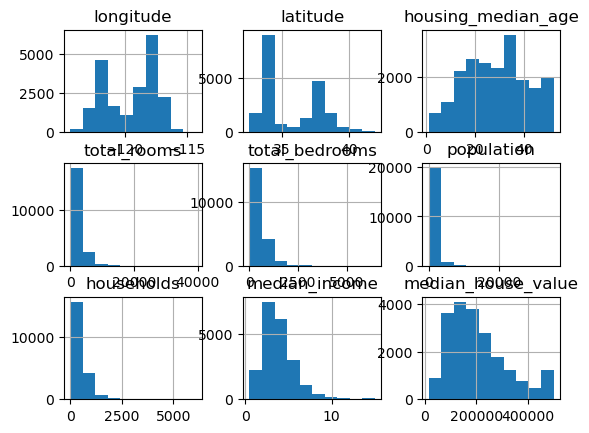

In [12]:
housing.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

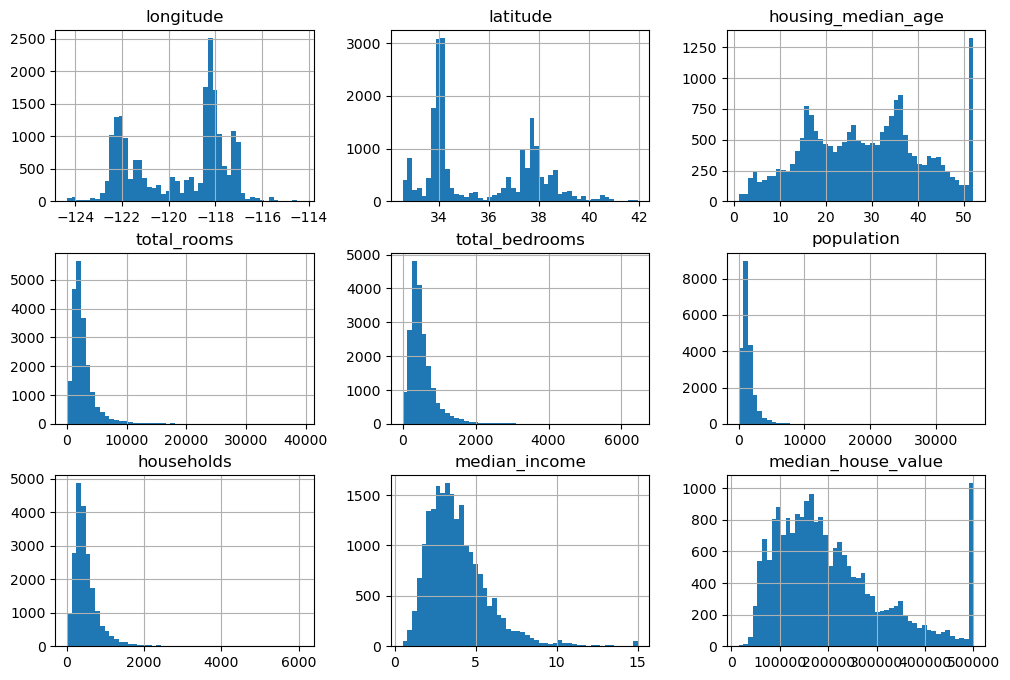

In [13]:
housing.hist(bins=50, figsize=(12, 8))

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Creating a test Set

In [16]:
import numpy as np

In [17]:
def shuffle_and_split_data(data, test_ratio):
    # Step 1: Generate a random permutation of indices based on the length of the dataset
    shuffled_indices = np.random.permutation(len(data))
    
    # Step 2: Calculate the number of test samples based on the specified test ratio
    test_set_size = int(len(data) * test_ratio)
    
    # Step 3: Select the indices for the test set from the shuffled indices
    test_indices = shuffled_indices[:test_set_size]
    
    # Step 4: Select the remaining indices for the training set
    train_indices = shuffled_indices[test_set_size:]
    
    # Step 5: Return the training and test sets by using the indices to index the original data
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
# Step 1: Split the housing dataset into training and test sets
# The function shuffle_and_split_data will shuffle the data randomly and then 
# split it according to the given test_ratio (0.2 = 20% of the data goes to the test set)
train_set, test_set = shuffle_and_split_data(housing, 0.2)

# Step 2: Calculate the length (number of rows) of the training set
# len(train_set) will return the number of rows in the training set after the shuffle and split
# Since the test_ratio is 0.2, we expect 80% of the total rows to be in the training set
train_set_length = len(train_set)

In [19]:
len(test_set)

4128

In [20]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20369,-114.63,32.76,15.0,1448.0,378.0,949.0,300.0,0.8585,45000.0,INLAND
443,-122.42,37.80,52.0,2657.0,772.0,1014.0,685.0,4.0380,500001.0,NEAR BAY
11721,-121.09,39.22,25.0,2200.0,439.0,1045.0,419.0,2.6042,116700.0,INLAND
4551,-119.77,36.79,27.0,2258.0,427.0,1076.0,423.0,2.9937,81100.0,INLAND
17160,-118.61,35.47,13.0,2267.0,601.0,756.0,276.0,2.5474,78400.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

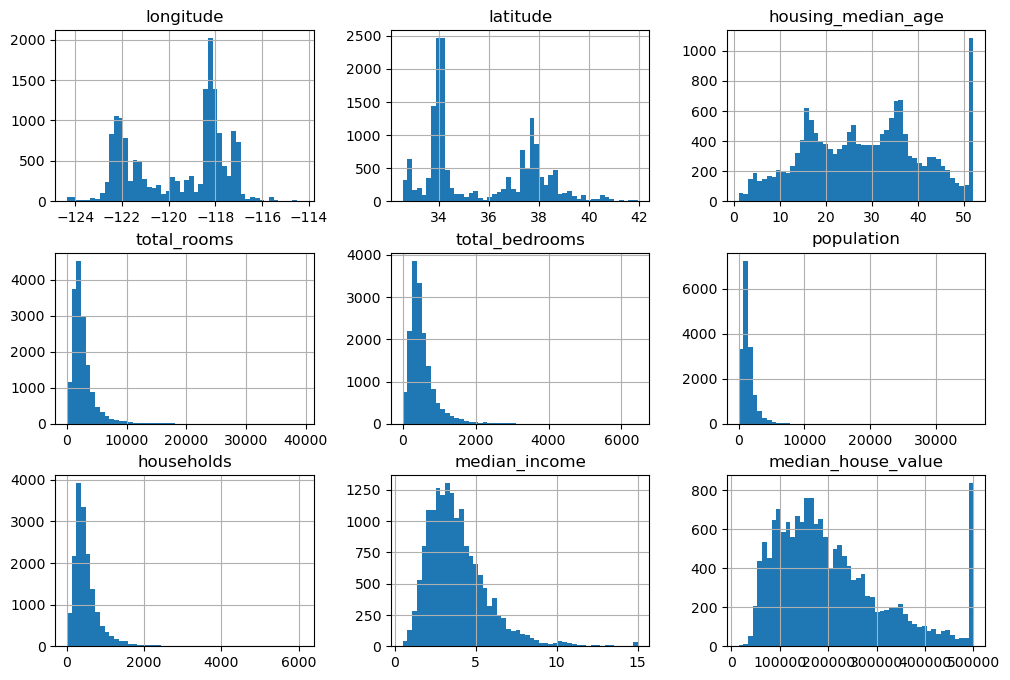

In [21]:
train_set.hist(bins=50, figsize=(12, 8))

In [22]:
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.000000,4128.00000,4128.000000,4128.000000,4088.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.574879,35.63444,28.539971,2605.354651,532.172456,1411.994671,493.950824,3.876129,206434.663033
std,2.000089,2.13372,12.470633,2078.624522,408.591308,1047.641157,368.617914,1.905201,113062.767349
min,-124.250000,32.55000,1.000000,15.000000,3.000000,8.000000,4.000000,0.499900,17500.000000
25%,-121.790000,33.94000,18.000000,1438.000000,289.000000,782.750000,276.000000,2.571225,122175.000000
50%,-118.510000,34.26000,29.000000,2127.500000,434.000000,1171.000000,410.000000,3.541000,181300.000000
75%,-118.000000,37.70000,37.000000,3182.000000,654.500000,1744.250000,609.500000,4.759275,262500.000000
max,-114.550000,41.95000,52.000000,30401.000000,4957.000000,13251.000000,4339.000000,15.000100,500001.000000


In [23]:
# Importing the crc32 function from the zlib module, which computes a CRC32 checksum (a 32-bit hash) for given data.
from zlib import crc32

In [24]:
def is_id_in_test_set(identifier, test_ratio):
    # The function checks whether an identifier should belong to the test set based on its hash value.
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    # Extract the column that contains the identifiers
    ids = data[id_column]
    
    # Apply the 'is_id_in_test_set' function to each identifier
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    
    # Split the data into test and training sets based on the 'in_test_set' boolean values
    return data.loc[~in_test_set], data.loc[in_test_set]

In [25]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2,
"index")


In [26]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2,
"id")

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

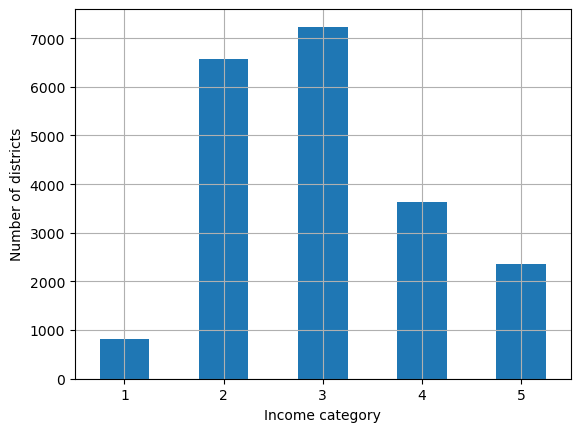

In [30]:
# Creating a new category column 'income_cat' based on 'median_income'
# The 'pd.cut' function divides the 'median_income' values into discrete intervals (bins)
# Note that 'bins' defines the edges of these intervals, and 'labels' assigns categories to each interval.

housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  # Defines the income intervals
                               labels=[1, 2, 3, 4, 5])  # Assigns labels to each income interval

# Display the frequency of each income category in the 'income_cat' column
# 'value_counts()' counts the occurrences of each category, and 'sort_index()' orders the result by category
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

# Adding labels and title for the bar chart
plt.xlabel("Income category")  # X-axis label
plt.ylabel("Number of districts")  # Y-axis label
plt.show()  # Display the plot


In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
# Initialize the StratifiedShuffleSplit object
# n_splits=10 means we want to generate 10 different train-test splits
# test_size=0.2 means 20% of the data will be used for the test set, and 80% for the training set
# random_state=42 ensures that the splits are reproducible (same split every time)
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Initialize an empty list to store the stratified splits (train and test sets)
strat_splits = []

# Iterate over the splits generated by StratifiedShuffleSplit
# `train_index` and `test_index` are the indices of the training and test sets, respectively
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    # Using .loc to select the rows corresponding to the test set (based on test_index)
    strat_train_set_n = housing.loc[train_index]  # select training set rows
    strat_test_set_n = housing.loc[test_index]  # Select test set rows
    
    # Append the current train-test split (each pair of train and test sets) to the strat_splits list
    strat_splits.append([strat_train_set_n, strat_test_set_n])

# After all splits are done, extract the first train-test pair from the strat_splits list
# This gives you the training and testing sets for the first split
strat_train_set, strat_test_set = strat_splits[0]

In [33]:
print(strat_train_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity income_cat  
13096        NEAR BAY          2  
14973       <1H OCEAN          5  
3785       

In [34]:
print(strat_test_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   

       population  households  median_income  median_house_value  \
3905        913.0       341.0         7.7360            397700.0   
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   
13928       725.0       392.0         3.6037            187500.0   

      ocean_proximity income_cat  
3905        <1H OCEAN          5  
16821       <1H OCEAN          4  
2900       

In [35]:
# Split the 'housing' dataset into training and test sets using train_test_split
# - 'test_size=0.2' means 20% of the data will be used for the test set and 80% for training
# - 'stratify=housing["income_cat"]' ensures the 'income_cat' column's class distribution is preserved in both sets
# - 'random_state=42' ensures that the split is reproducible (same split each time)
strat_train_set, strat_test_set = train_test_split(
    housing,                # The dataset to split
    test_size=0.2,          # Proportion of the data to be used as the test set (20%)
    stratify=housing["income_cat"],  # Ensures the 'income_cat' class distribution is preserved in both train and test sets
    random_state=42         # Ensures reproducibility (same split every time)
)


# Count the occurrences of each unique value in the "income_cat" column
# and then divide by the total number of rows in the DataFrame to get the proportion
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

## **Removing the "income_cat" Column After Stratified Sampling**

In [37]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

In [39]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

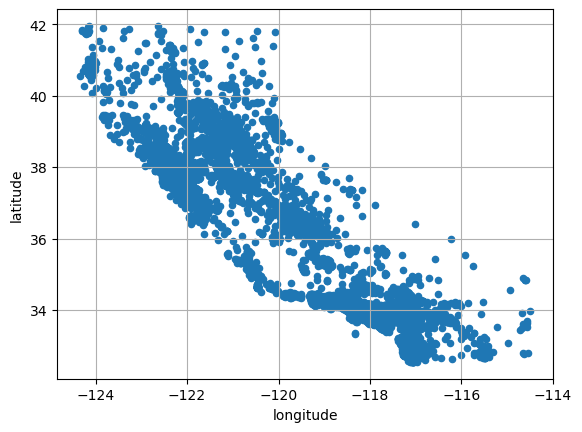

In [40]:
# Visualizing Geographical Data
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)

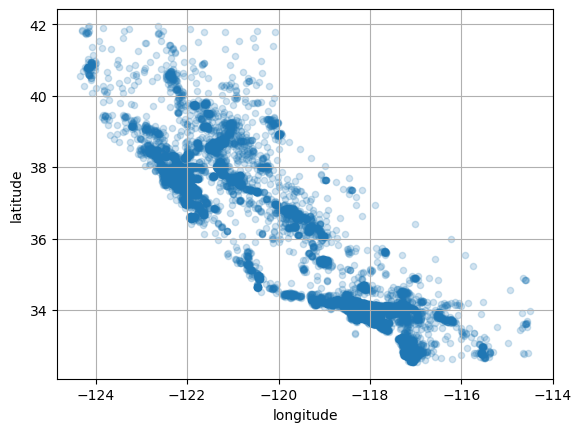

In [41]:
# Create a scatter plot of housing data showing the geographic distribution
housing.plot(kind="scatter",   # Specify that we want a scatter plot
             x="longitude",    # Use the 'longitude' column for the x-axis
             y="latitude",     # Use the 'latitude' column for the y-axis
             grid=True,        # Display a grid on the plot for better readability
             alpha=0.2)        # Set point transparency to 20% to reduce clutter from overlapping points
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

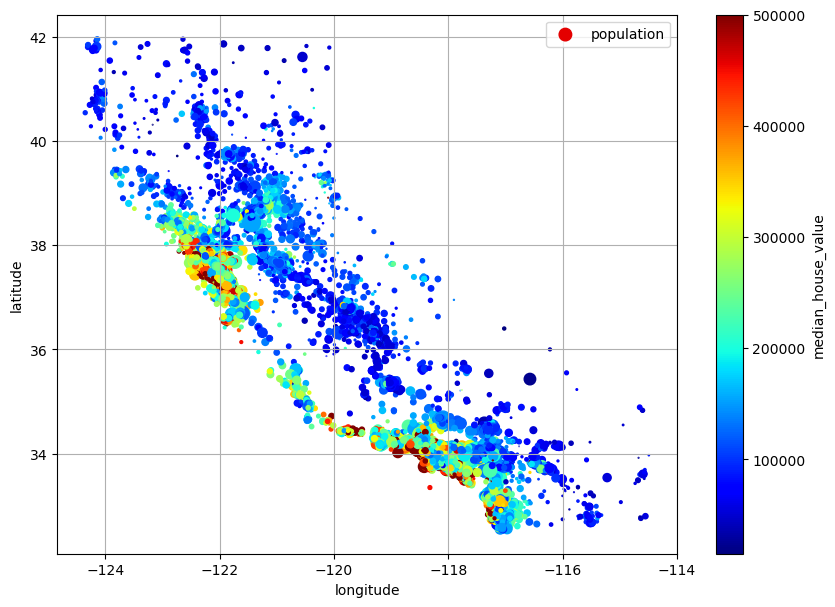

In [42]:
# Create a scatter plot with enhanced features to visualize housing data geographically
housing.plot(kind="scatter",    # Create a scatter plot to visualize data points
             x="longitude",     # Use the 'longitude' column for the x-axis
             y="latitude",      # Use the 'latitude' column for the y-axis
             grid=True,         # Display a grid on the plot to improve readability
             s=housing["population"] / 100,  # Set the size of each point based on the population column (scaled down by 100)
             label="population",  # Add a label to the points based on the population size for clarity in the legend
             c="median_house_value",  # Color each point based on the 'median_house_value' column to show property price variations
             cmap="jet",         # Use the 'jet' colormap to represent different house values (colors vary from blue to red)
             colorbar=True,      # Display a colorbar to map colors to median house values
             legend=True,        # Add a legend to the plot for better interpretation of the data
             sharex=False,       # Do not share the x-axis between subplots (useful if you have multiple plots)
             figsize=(10, 7))    # Set the figure size to 10x7 inches to make the plot larger and more readable

## Looking for Correlations

In [50]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


## Correcting the above Error from above

In [52]:
# Select only numeric columns from the 'housing' DataFrame
numeric_housing = housing.select_dtypes(include=[np.number])  

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_housing.corr()  
# The 'corr()' function computes pairwise correlations between numeric columns in the DataFrame.
# The result is a correlation matrix where each value represents the correlation coefficient between two columns.

# Sort the correlation values for the 'median_house_value' column in descending order
corr_matrix["median_house_value"].sort_values(ascending=False)  
# This sorts the correlation values for 'median_house_value' (the target variable) 
# in descending order to identify which features have the strongest correlation with the target.
# 'ascending=False' ensures the sorting is in descending order (from highest to lowest).


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

## Pandas scatter_matrix() function

In [54]:
from pandas.plotting import scatter_matrix

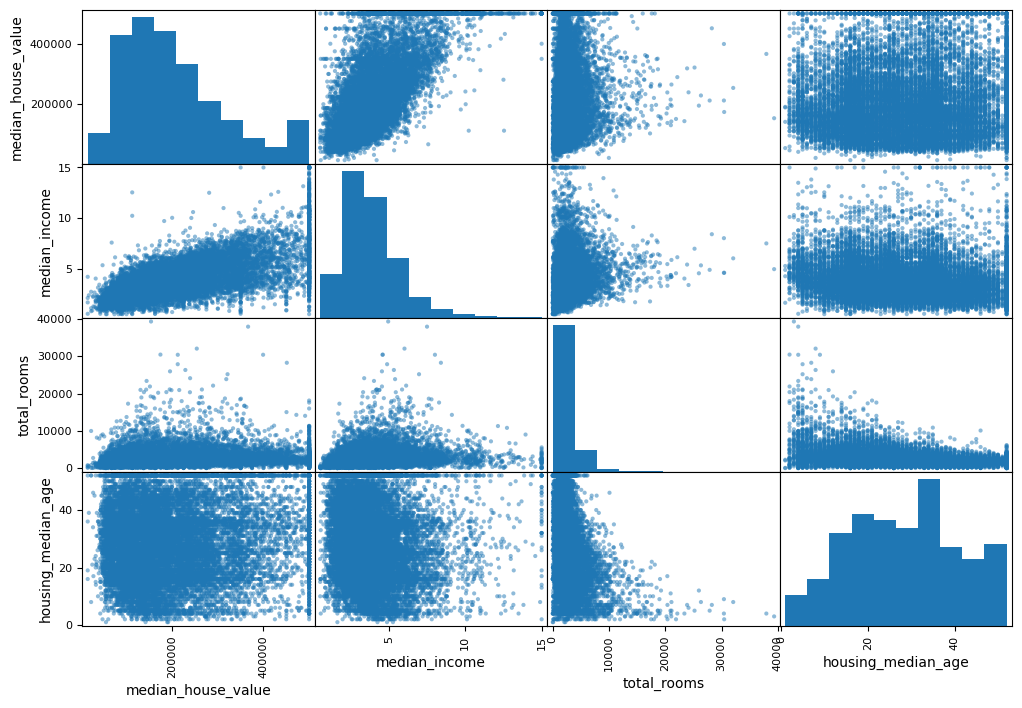

In [55]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

## These scatter matrix above plots every numerical attribute against every other numerical attribute, plus a histogram of each numerical attribute’s values on the main diagonal (top left to bottom right) ##

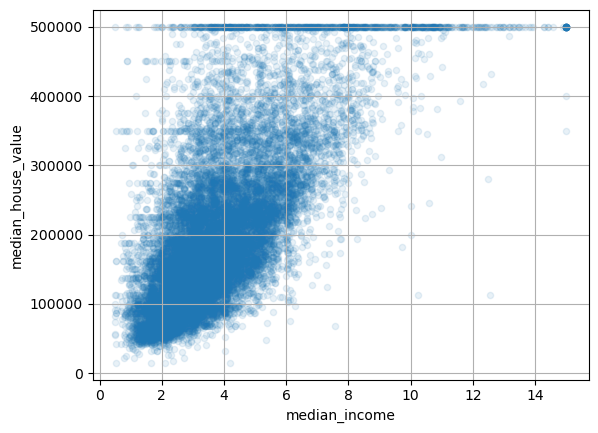

In [57]:
housing.plot(kind="scatter", 
             x="median_income", 
             y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [58]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["households"]

13096    1034.0
14973     357.0
3785      203.0
14689     780.0
20507    1172.0
          ...  
14207     523.0
13105     532.0
19301     760.0
19121     838.0
19888     212.0
Name: households, Length: 16512, dtype: float64

In [59]:
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["total_rooms"]

13096    3321.0
14973    1965.0
3785     1083.0
14689    4174.0
20507    4366.0
          ...  
14207    2237.0
13105    2945.0
19301    3920.0
19121    3781.0
19888     431.0
Name: total_rooms, Length: 16512, dtype: float64

In [60]:
housing["people_per_house"] = housing["population"] / housing["households"]
housing["households"]

13096    1034.0
14973     357.0
3785      203.0
14689     780.0
20507    1172.0
          ...  
14207     523.0
13105     532.0
19301     760.0
19121     838.0
19888     212.0
Name: households, Length: 16512, dtype: float64

In [61]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

ValueError: could not convert string to float: 'NEAR BAY'

In [70]:
# Select only numeric columns from the 'housing' DataFrame
numeric_housing = housing.select_dtypes(include=[np.number])  

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_housing.corr()  
# The 'corr()' function computes pairwise correlations between numeric columns in the DataFrame.
# The result is a correlation matrix where each value represents the correlation coefficient between two columns.

# Sort the correlation values for the 'median_house_value' column in descending order
corr_matrix["median_house_value"].sort_values(ascending=False)  
# This sorts the correlation values for 'median_house_value' (the target variable) 
# in descending order to identify which features have the strongest correlation with the target.
# 'ascending=False' ensures the sorting is in descending order (from highest to lowest).


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Preparing Data for Machine Learning

In [72]:
# Drop the target variable 'median_house_value' from the training set.
# 'axis=1' specifies that we're dropping a column (if we wanted to drop rows, we'd use axis=0).
housing = strat_train_set.drop("median_house_value", axis=1)

# Create a new variable 'housing_labels' that contains just the target variable 'median_house_value'.
# '.copy()' ensures that 'housing_labels' is a separate copy, preventing changes in 'housing_labels' 
# from affecting 'strat_train_set'.
housing_labels = strat_train_set["median_house_value"].copy()

# Handling Missing Data with Median Imputation

In [74]:
# Import the SimpleImputer class from scikit-learn
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer, setting the strategy to 'median' 
# (this means missing values will be replaced by the median value of the column)
imputer = SimpleImputer(strategy="median")

# Select all numerical columns from the 'housing' DataFrame
# 'select_dtypes' is used to filter the DataFrame based on column data types (in this case, numerical types)
housing_num = housing.select_dtypes(include=(np.number))

# Fit the imputer to the numerical columns of the 'housing' DataFrame
# This step computes the median value for each column, which will be used to replace missing values
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [75]:
# Access the learned statistics from the imputer (the median values for each numerical column)
# imputer.statistics_ stores the computed medians for each column in housing_num
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [76]:
# Compute the median for each numerical column manually using the pandas median() method
# housing_num.median() calculates the median values for each column in the numerical DataFrame
# .values extracts the underlying NumPy array from the resulting pandas Series
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [77]:
# Transform the original numerical data (housing_num) by replacing missing values with the computed medians
# The transform() method replaces NaN values with the statistics learned during the fit() step
X = imputer.transform(housing_num)

In [78]:
# Create a new DataFrame housing_tr using the transformed data (X)
# Then retain the original column names and indices from the original housing_num DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [79]:
# Select the categorical column 'ocean_proximity' from the 'housing' DataFrame
# housing_cat will contain only the 'ocean_proximity' column (which is categorical)
housing_cat = housing[["ocean_proximity"]]

In [80]:
# Display the first 10 rows of the 'ocean_proximity' column
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [81]:
# Import the OrdinalEncoder class from scikit-learn
# OrdinalEncoder is used to convert categorical variables (such as strings) into numerical representations
# where each category is assigned a unique integer.
from sklearn.preprocessing import OrdinalEncoder

In [82]:
# Create an instance of OrdinalEncoder
# The OrdinalEncoder will convert categorical values into integers, where each category gets a unique integer.
# The encoder assumes the categories are ordered, but in many cases, they might not be (e.g., 'Low', 'Medium', 'High').
# It will assign an integer to each category based on the order it encounters.
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'housing_cat' DataFrame using the OrdinalEncoder
# The fit_transform method does two things:
# - First, it "fits" the encoder to the data, learning all unique categories from the 'housing_cat' DataFrame.
# - Then, it "transforms" the categorical data (in 'housing_cat') into numerical values, replacing each category 
#   with an integer representing that category.
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Display the first 8 encoded rows
# We use [:8] to show a subset of the transformed data (first 8 rows).
# This will allow us to quickly inspect the results and see the integer encoding for each categorical entry.
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [83]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [84]:
# Display the encoded version of the categorical data
print(housing_cat_encoded)

[[3.]
 [0.]
 [1.]
 ...
 [4.]
 [0.]
 [4.]]


# One-Hot Encoding of Categorical Features using OneHotEncoder in Scikit-Learn

In [86]:
# Import the OneHotEncoder class from scikit-learn's preprocessing module
# OneHotEncoder is used to convert categorical features into a one-hot encoded format (binary matrix)
from sklearn.preprocessing import OneHotEncoder

In [87]:
# Create an instance of the OneHotEncoder class
# This encoder will convert categorical features into a binary matrix, where each category gets its own column
cat_encoder = OneHotEncoder()

# Fit the encoder to the 'housing_cat' DataFrame and transform the categorical data
# This step learns the unique categories from the 'housing_cat' DataFrame and encodes them into a binary matrix
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Display the transformed data
# housing_cat_1hot is now a sparse matrix containing the one-hot encoded data for each category in 'housing_cat'
# The result is a matrix where each row represents a sample, and each column represents a category encoded as 0 or 1
print(housing_cat_1hot)

# We can also convert the sparse matrix to a dense matrix (for visualization)
# (Optional) Convert to dense format to inspect the encoded data
dense_housing_cat_1hot = housing_cat_1hot.toarray()
print("One-hot encoded data (dense format):")
print(dense_housing_cat_1hot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 3)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 4)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 3)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 3)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 4)	1.0
  (22, 1)	1.0
  (23, 3)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 0)	1.0
  (16490, 3)	1.0
  (16491, 1)	1.0
  (16492, 4)	1.0
  (16493, 4)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 0)	1.0
  (16499, 4)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 0)	1.0
  (16503, 0)	1.0
  (16504, 0)	1.0
  (16505, 0)	1.0
  (16506, 1)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 4)	1.0
  (16510, 0)	1.0
  (16511, 4)	1.0
One-hot encoded data (dense format):
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 

# One-Hot Encoding with pd.get_dummies() (Boolean vs Integer Representation)

In [89]:
# Creating a new DataFrame 'df_test' with a column 'ocean_proximity'
# This column contains two categories: "INLAND" and "NEAR BAY"
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})

# Using pd.get_dummies() to perform one-hot encoding on the 'ocean_proximity' column
# pd.get_dummies automatically converts categorical variables into a one-hot encoded format
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [90]:
cat_encoder.transform(df_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 5)>

In [110]:
df_test_unknown = pd.DataFrame ({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})

In [114]:
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [116]:
cat_encoder.handle_unknown = "ignore"

In [118]:
cat_encoder.transform(df_test_unknown)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (2, 5)>

In [122]:
# Transform the categorical features in df_test_unknown using the fitted encoder (cat_encoder)
dense_result = cat_encoder.transform(df_test_unknown).toarray()
print(dense_result)

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [124]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [126]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [150]:
from sklearn.preprocessing import StandardScaler

In [158]:
std_scaler = StandardScaler()
housing_number_std_scaled = std_scaler.fit_transform(housing_num)

In [164]:
housing_number_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

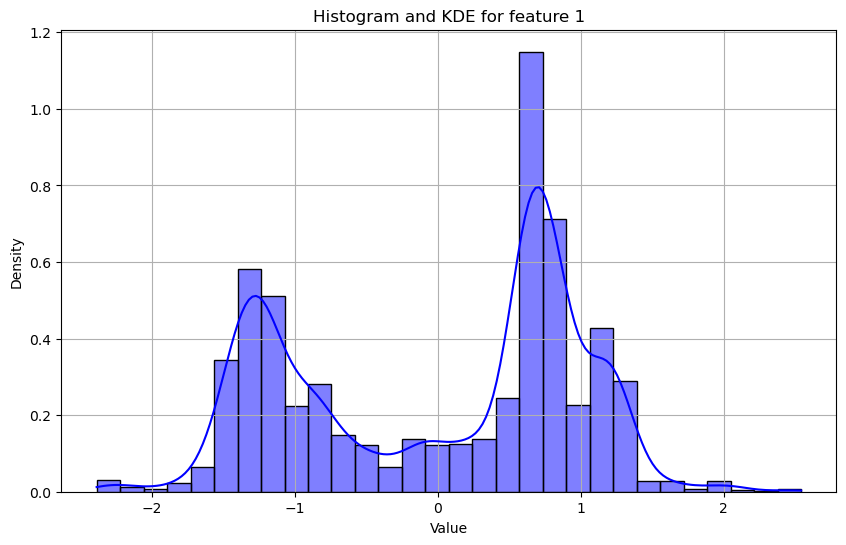

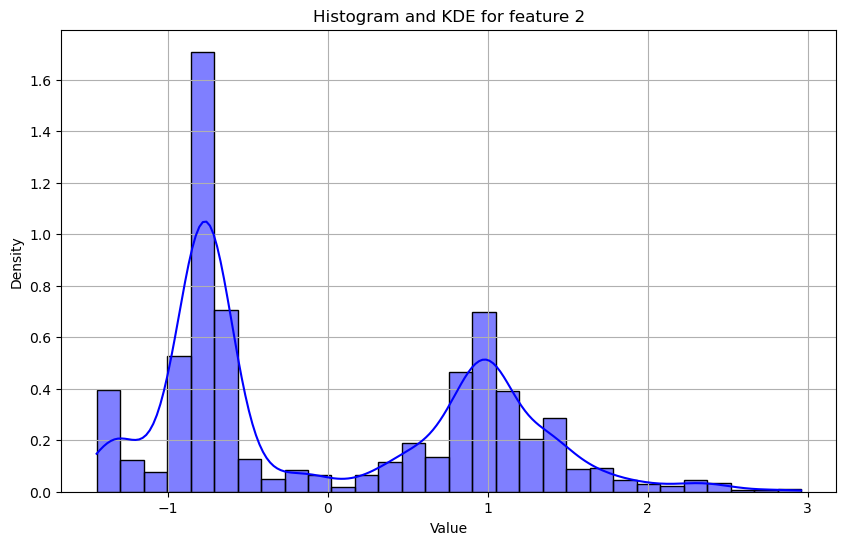

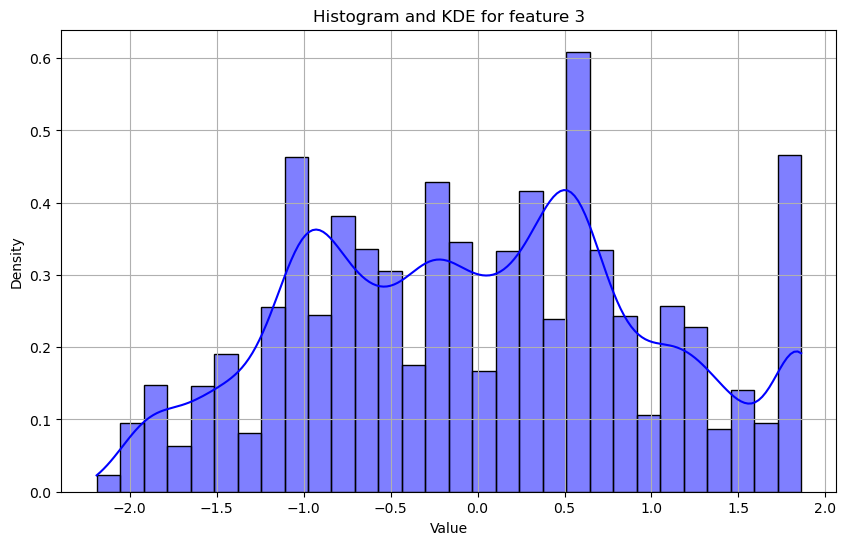

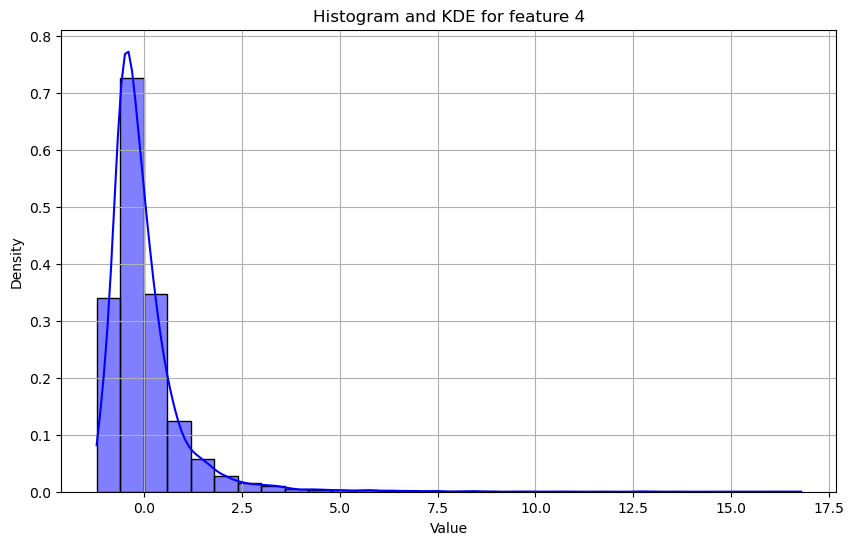

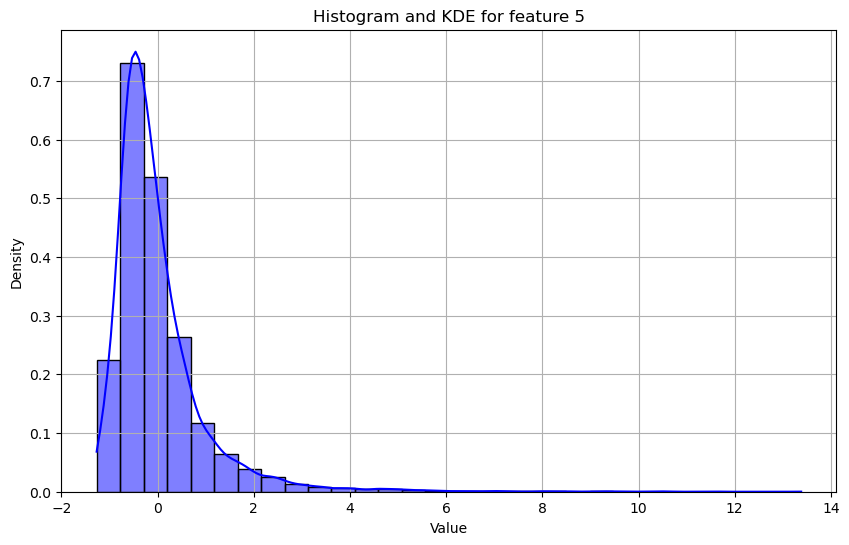

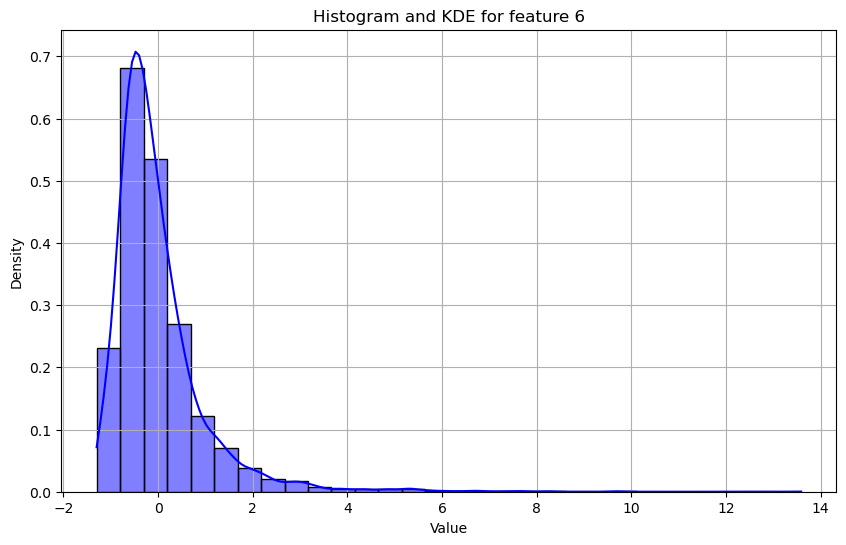

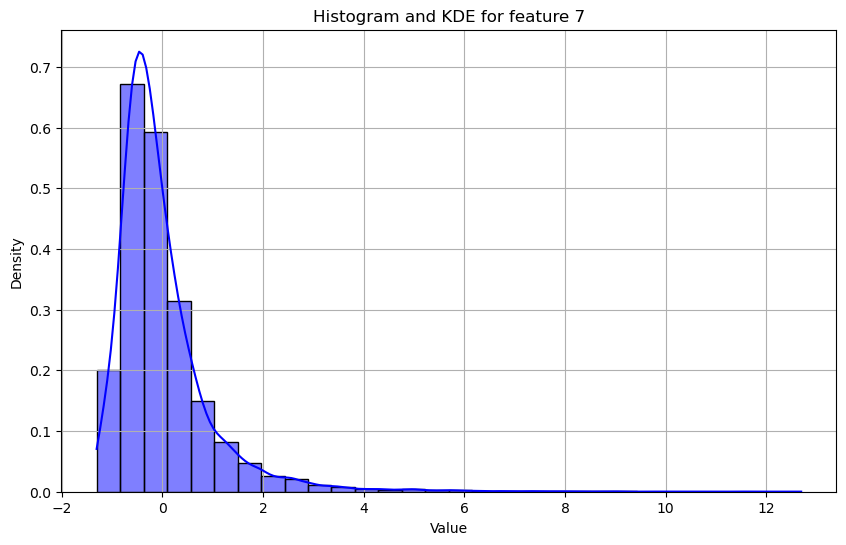

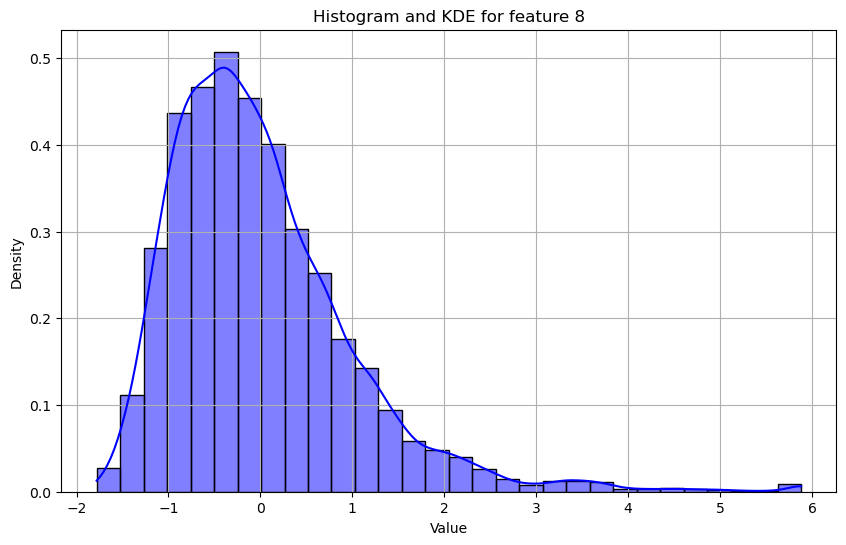

In [166]:
for column in range(housing_number_std_scaled.shape[1]):
    plt.figure(figsize=(10, 6))
    sns.histplot(housing_number_std_scaled[:, column], kde=True, stat="density", bins=30, color='blue')
    plt.title(f'Histogram and KDE for feature {column + 1}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='district', y='population', data=housing, color='blue')
plt.title('Scatter Plot: Number of Districts vs Population')
plt.xlabel('Number of Districts')
plt.ylabel('Population')
plt.grid(True)
plt.show()

ValueError: Could not interpret value `district` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>